Import Pandas untuk melakukan read_csv

In [44]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('customer_data.csv')
dataset

,No,Tinggi Badan (cm),Berat Badan (kg),Ukuran Kaos
0,1,158,58,M
1,2,158,59,M
2,3,158,63,M
3,4,160,59,M
4,5,160,60,M
5,6,163,60,M
6,7,163,61,M
7,8,160,64,L
8,9,163,64,L
9,10,165,61,L


Mengambil Tinggi badan dan Berat badan sebagai features dan Ukuran Kaos sebagai target

In [45]:
features = dataset[['Tinggi Badan (cm)', 'Berat Badan (kg)']]
features

,Tinggi Badan (cm),Berat Badan (kg)
0,158,58
1,158,59
2,158,63
3,160,59
4,160,60
5,163,60
6,163,61
7,160,64
8,163,64
9,165,61


In [46]:
target = dataset[['Ukuran Kaos']]
target

,Ukuran Kaos
0,M
1,M
2,M
3,M
4,M
5,M
6,M
7,L
8,L
9,L


Melakukan preprocessing terhadap features dengan bantuan minmaxscaler

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(features)
features = scaler.transform(features)
print(features)
print(target)

[[0.         0.        ]
 [0.         0.1       ]
 [0.         0.5       ]
 [0.16666667 0.1       ]
 [0.16666667 0.2       ]
 [0.41666667 0.2       ]
 [0.41666667 0.3       ]
 [0.16666667 0.6       ]
 [0.41666667 0.6       ]
 [0.58333333 0.3       ]
 [0.58333333 0.4       ]
 [0.58333333 0.7       ]
 [0.83333333 0.4       ]
 [0.83333333 0.5       ]
 [0.83333333 0.8       ]
 [1.         0.5       ]
 [1.         0.6       ]
 [1.         1.        ]]
   Ukuran Kaos
0            M
1            M
2            M
3            M
4            M
5            M
6            M
7            L
8            L
9            L
10           L
11           L
12           L
13           L
14           L
15           L
16           L
17           L


Melakukan plotting untuk semua data dengan ukuran M berwarna biru dan L berwarna hitam

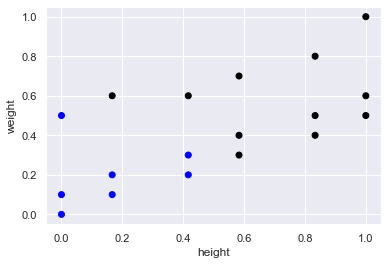

In [83]:
from matplotlib import pyplot

x = [data[0] for data in features]
y = [data[1] for data in features]

color_dic = {'M': '#0000ff',
             'L': '#000000'}

colors = [color_dic[label] for label in target['Ukuran Kaos']]

pyplot.scatter(x, y, c=colors)
pyplot.xlabel('height')
pyplot.ylabel('weight')
pyplot.show()

Melakukan algoritma KNN dengan bantuan sklearn. Algoritma KNN ini akan mencari jarak terdekat antar titik yang ingin di prediksi dengan seluruh titik yang ada. Rumus yang digunakan untuk mencari jarak adalah euclidean yaitu sqrt((x[titik]-x_pred)^2 + (y[titik] - y_pred)^2)

Kemudian dilihat 5 jarak terdekat dari titik prediksi, ukuran kaos yang paling banyak muncul dari kelima jarak terdekat adalah ukuran kaos untuk titik prediksi

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(features, target['Ukuran Kaos'])

KNeighborsClassifier(metric='euclidean')

In [85]:
x_test = [[161, 61]]
x_test = scaler.transform(x_test)
pred = knn.predict(x_test)
pred

array(['M'], dtype=object)

Setelah dilakukan prediksi, titik prediksi diperkirakan memiliki ukuran kaos M dan berada di titik sebagai plot diberikut

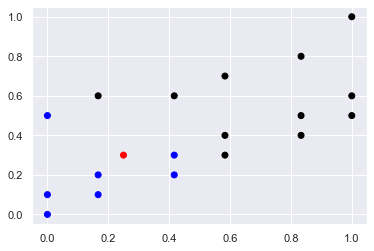

In [86]:
x.append(x_test[0][0])
y.append(x_test[0][1])
colors.append('#ff0000')

pyplot.scatter(x, y, c=colors)
pyplot.show()